In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams

mpl.rcParams['figure.figsize'] = (13,13*0.618)
rcParams['font.family'] = 'serif'
# rcParams['text.usetex'] = True
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

ftsz = 22
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import numpy as np

In [2]:
st = np.sqrt( 0.02 )

theta = np.arcsin( st )

c2t = np.cos( 2* theta )
# c2t = 0.9

def ene1(lam):
  
  return 0.5*np.sqrt( lam**2 + 1 - 2 * lam * c2t )


def ene2(lam):
  
  return -0.5*np.sqrt( lam**2 + 1 - 2 * lam * c2t )


In [25]:
c2t

0.96

In [26]:
lam_arr = np.linspace( 0 , 1.8, 100  )

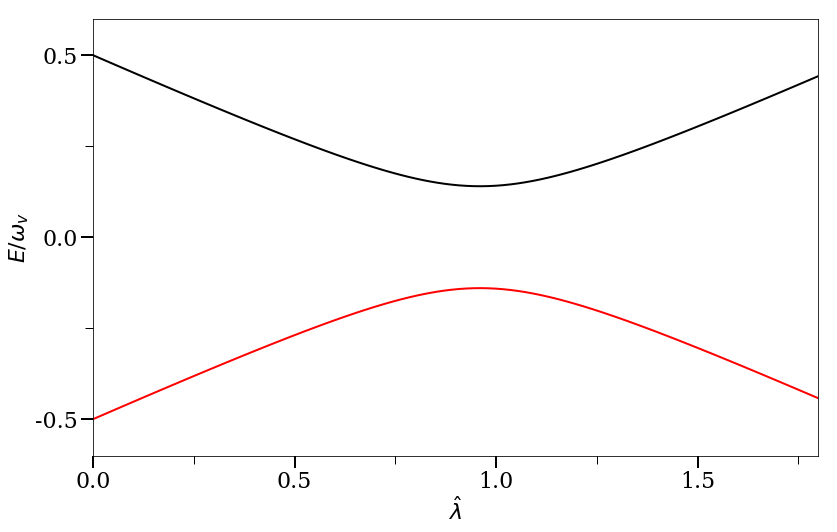

In [29]:
aplt, ax = plt.subplots()

aplt = plt.plot(lam_arr, ene1(lam_arr) ,'k-', lam_arr, ene2(lam_arr) ,'r-', markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('$\hat \lambda$', fontsize=ftsz)
plt.ylabel('$E/\omega_{v}$', fontsize=ftsz)
plt.ylim([-0.6, 0.6])
plt.xlim([0,1.8])
# plt.legend(['Rabi Formula','Numerical Solution'], fontsize=ftsz,frameon=False,loc=1)

ax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
ax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)


majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%0.1f')
minorLocator = MultipleLocator(0.25)

majorLocatory = MultipleLocator(0.5)
majorFormattery = FormatStrFormatter('%0.1f')
minorLocatory = MultipleLocator(0.25)


ax.xaxis.set_major_locator( majorLocator )
ax.xaxis.set_major_formatter( majorFormatter )

ax.yaxis.set_major_locator( majorLocatory )
ax.yaxis.set_major_formatter( majorFormattery )


ax.xaxis.set_minor_locator( minorLocator )
ax.yaxis.set_minor_locator( minorLocatory )

# plt.show()

# plt.legend(['$E_1$','$E_2$'])

plt.savefig('mswEnergyLevels.pdf',bbox_inches='tight')

## Vacuum

In [7]:
def prob(r):
    thetav = 0.579640
    omegav = 1
    
    return 1 - ( np.sin(2*thetav) ** 2 ) * ( np.sin(omegav * r/2) )**2
    

In [8]:
probxlin = np.linspace(0,10,1000)
problin = prob(probxlin)

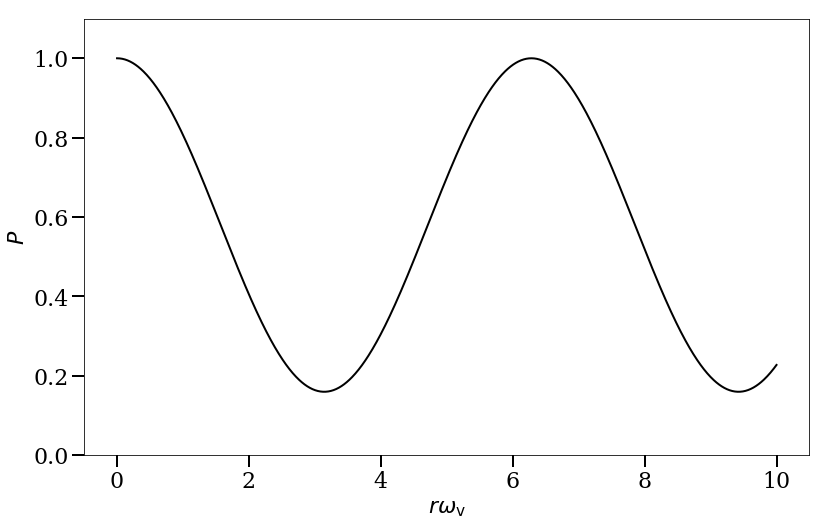

In [21]:
plt.plot(probxlin,problin, 'k', linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('$r\omega_{\mathrm{v}}$', fontsize=ftsz)
plt.ylabel('$P$', fontsize=ftsz)
plt.ylim([0,1.1])

plt.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
plt.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)

plt.savefig('neutrino-vaccum-osc-2-flavor.pdf',bbox_inches='tight')

plt.show()

## Rabi

In [38]:
def rabi_formula(a,k, t):
    d = (k-1)/a
    return ( 1/( 1 + d**2 ) ) * np.sin( np.sqrt(a**2 + ( k-1 )**2 ) * t / 2 ) **2

In [50]:
rabi_t = np.linspace(0,200,10000)
rabi_p = rabi_formula( 0.1, 1, rabi_t )
rabi_p_2 = rabi_formula( 0.1, 1.1, rabi_t )

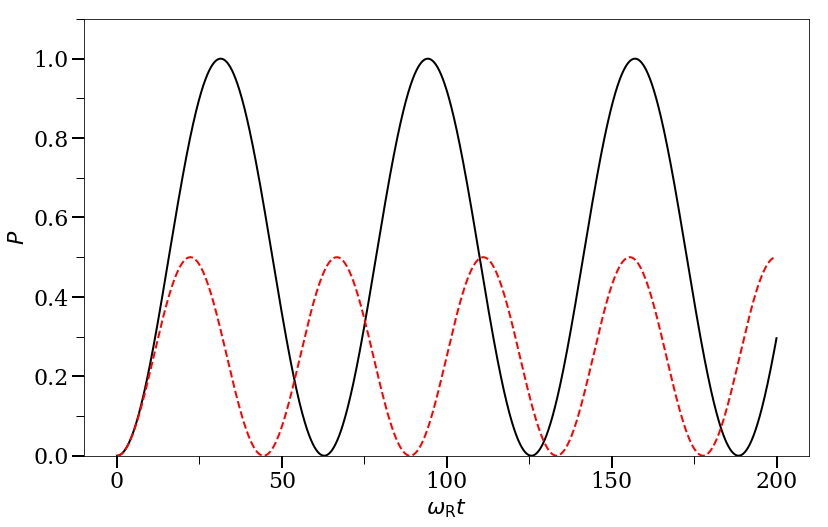

In [63]:
rabi_plt, rabi_ax = plt.subplots()

rabi_plt = plt.plot(rabi_t, rabi_p ,'k-', rabi_t, rabi_p_2, 'r--', markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('$\omega_{\mathrm{R}} t$', fontsize=ftsz)
plt.ylabel('$P$', fontsize=ftsz)
plt.ylim([0, 1.1])
# plt.xlim([0,100])

rabi_ax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
rabi_ax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)

rabi_majorLocator = MultipleLocator(50)
rabi_majorFormatter = FormatStrFormatter('%0.0f')
rabi_minorLocator = MultipleLocator(25)

rabi_majorLocatory = MultipleLocator(0.2)
rabi_majorFormattery = FormatStrFormatter('%0.1f')
rabi_minorLocatory = MultipleLocator(0.1)

rabi_ax.xaxis.set_major_locator( rabi_majorLocator )
rabi_ax.xaxis.set_major_formatter( rabi_majorFormatter )

rabi_ax.yaxis.set_major_locator( rabi_majorLocatory )
rabi_ax.yaxis.set_major_formatter( rabi_majorFormattery )

rabi_ax.xaxis.set_minor_locator( rabi_minorLocator )
rabi_ax.yaxis.set_minor_locator( rabi_minorLocatory )

# plt.show()
plt.savefig('rabi-oscillations.pdf',bbox_inches='tight')

In [85]:
def relative_detuning(d):
    return 1/(1+d**2)


def relative_detuning_2(a, k):
    d = ( k-1 )/a
    return 1/(1+d**2)

In [86]:
rabi_d = np.linspace(0,2,200)
rabi_d_det = relative_detuning(rabi_d)
rabi_d_det_2 = relative_detuning_2(0.1,rabi_d)

In [87]:
relative_detuning_2(0.1,0)

0.009900990099009901

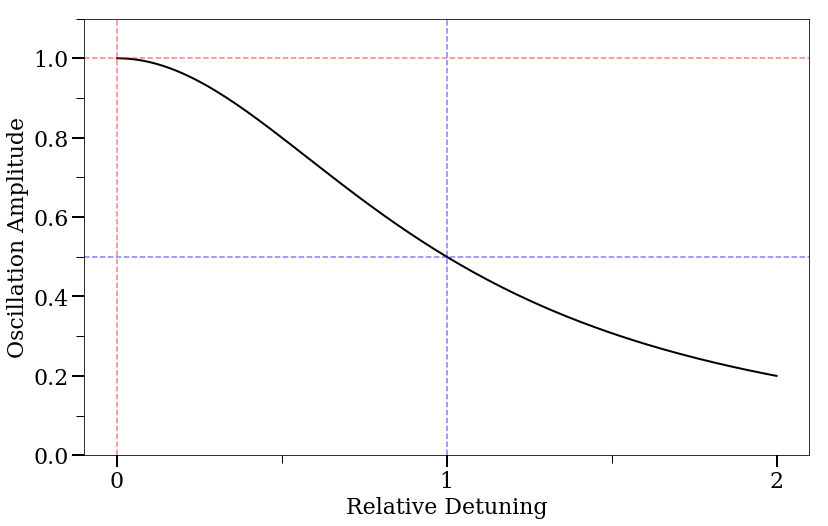

In [80]:
rabi_plt, rabi_ax = plt.subplots()

rabi_plt = plt.plot(rabi_d, rabi_d_det ,'k-', markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('Relative Detuning', fontsize=ftsz)
plt.ylabel('Oscillation Amplitude', fontsize=ftsz)
plt.ylim([0, 1.1])
# plt.xlim([0,100])

rabi_ax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
rabi_ax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)

rabi_majorLocator = MultipleLocator(1)
rabi_majorFormatter = FormatStrFormatter('%0.0f')
rabi_minorLocator = MultipleLocator(0.5)

rabi_majorLocatory = MultipleLocator(0.2)
rabi_majorFormattery = FormatStrFormatter('%0.1f')
rabi_minorLocatory = MultipleLocator(0.1)

rabi_ax.xaxis.set_major_locator( rabi_majorLocator )
rabi_ax.xaxis.set_major_formatter( rabi_majorFormatter )

rabi_ax.yaxis.set_major_locator( rabi_majorLocatory )
rabi_ax.yaxis.set_major_formatter( rabi_majorFormattery )

rabi_ax.xaxis.set_minor_locator( rabi_minorLocator )
rabi_ax.yaxis.set_minor_locator( rabi_minorLocatory )

rabi_ax.axvline(x=1, ls='--',color='b',alpha=0.5)
rabi_ax.axhline(y=0.5, ls='--',color='b',alpha=0.5)

rabi_ax.axvline(x=0, ls='--',color='r',alpha=0.5)
rabi_ax.axhline(y=1, ls='--',color='r',alpha=0.5)


# plt.show()
plt.savefig('rabi-resonance-detuning.pdf',bbox_inches='tight')

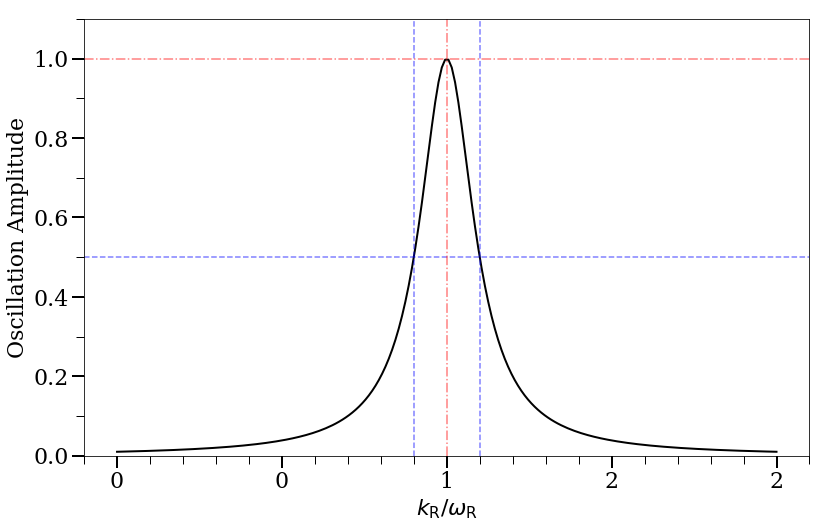

In [94]:
rabi_plt, rabi_ax = plt.subplots()

rabi_plt = plt.plot(rabi_d, rabi_d_det_2 ,'k-', markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('$k_{\mathrm{R}}/\omega_{\mathrm{R}}$', fontsize=ftsz)
plt.ylabel('Oscillation Amplitude', fontsize=ftsz)
plt.ylim([0, 1.1])
# plt.xlim([0,100])

rabi_ax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
rabi_ax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)

rabi_majorLocator = MultipleLocator(0.5)
rabi_majorFormatter = FormatStrFormatter('%0.0f')
rabi_minorLocator = MultipleLocator(0.1)

rabi_majorLocatory = MultipleLocator(0.2)
rabi_majorFormattery = FormatStrFormatter('%0.1f')
rabi_minorLocatory = MultipleLocator(0.1)

rabi_ax.xaxis.set_major_locator( rabi_majorLocator )
rabi_ax.xaxis.set_major_formatter( rabi_majorFormatter )

rabi_ax.yaxis.set_major_locator( rabi_majorLocatory )
rabi_ax.yaxis.set_major_formatter( rabi_majorFormattery )

rabi_ax.xaxis.set_minor_locator( rabi_minorLocator )
rabi_ax.yaxis.set_minor_locator( rabi_minorLocatory )

rabi_ax.axvline(x=1.1, ls='--',color='b',alpha=0.5)
rabi_ax.axvline(x=0.9, ls='--',color='b',alpha=0.5)
rabi_ax.axhline(y=0.5, ls='--',color='b',alpha=0.5)

rabi_ax.axvline(x=1, ls='-.',color='r',alpha=0.5)
rabi_ax.axhline(y=1, ls='-.',color='r',alpha=0.5)


# plt.show()
plt.savefig('rabi-resonance-width.pdf',bbox_inches='tight')

## Constructive Effect

In [47]:
%%bash
ls data/constructive

paper-interference-constructive-a1-a2-0.0001-0.-k1-k2-0.9999-0..csv
paper-interference-constructive-a1-a2-0.0001-0.02-k1-k2-0.9999-3..csv
paper-interference-constructive-a1-a2-0.025-0.-k1-k2-0.95-0..csv
paper-interference-constructive-a1-a2-0.025-0.4-k1-k2-0.95-2.6.csv
paper-interference-constructive-theory-a1-a2-0.0001-0.-k1-k2-0.9999-0..csv
paper-interference-constructive-theory-a1-a2-0.0001-0.02-k1-k2-0.9999-3..csv
paper-interference-constructive-theory-a1-a2-0.025-0.-k1-k2-0.95-0..csv
paper-interference-constructive-theory-a1-a2-0.025-0.4-k1-k2-0.95-2.6.csv


In [48]:
# papersol1=np.transpose( np.genfromtxt('data/constructive/paper-interference-constructive-a1-a2-0.025-0.-k1-k2-0.95-0..csv', delimiter=",") )
# papersol2=np.transpose( np.genfromtxt('data/constructive/paper-interference-constructive-a1-a2-0.025-0.4-k1-k2-0.95-2.6.csv', delimiter=",") )
# papertheory1=np.transpose( np.genfromtxt('data/constructive/paper-interference-constructive-theory-a1-a2-0.025-0.-k1-k2-0.95-0..csv', delimiter=",") )
# papertheory2=np.transpose( np.genfromtxt('data/constructive/paper-interference-constructive-theory-a1-a2-0.025-0.4-k1-k2-0.95-2.6.csv', delimiter=",") )
# papersolgridlines=np.genfromtxt('interference/paper-interference-theory-amplitude-20170318.csv', delimiter=",")[:4]

papersol1=np.transpose( np.genfromtxt('data/constructive/paper-interference-constructive-a1-a2-0.0001-0.-k1-k2-0.9999-0..csv', delimiter=",") )
papersol2=np.transpose( np.genfromtxt('data/constructive/paper-interference-constructive-a1-a2-0.0001-0.02-k1-k2-0.9999-3..csv', delimiter=",") )
papertheory1=np.transpose( np.genfromtxt('data/constructive/paper-interference-constructive-theory-a1-a2-0.0001-0.-k1-k2-0.9999-0..csv', delimiter=",") )
papertheory2=np.transpose( np.genfromtxt('data/constructive/paper-interference-constructive-theory-a1-a2-0.0001-0.02-k1-k2-0.9999-3..csv', delimiter=",") )


In [56]:
papersol1[0][-1]

400000.0

/Users/leima/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/Users/leima/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


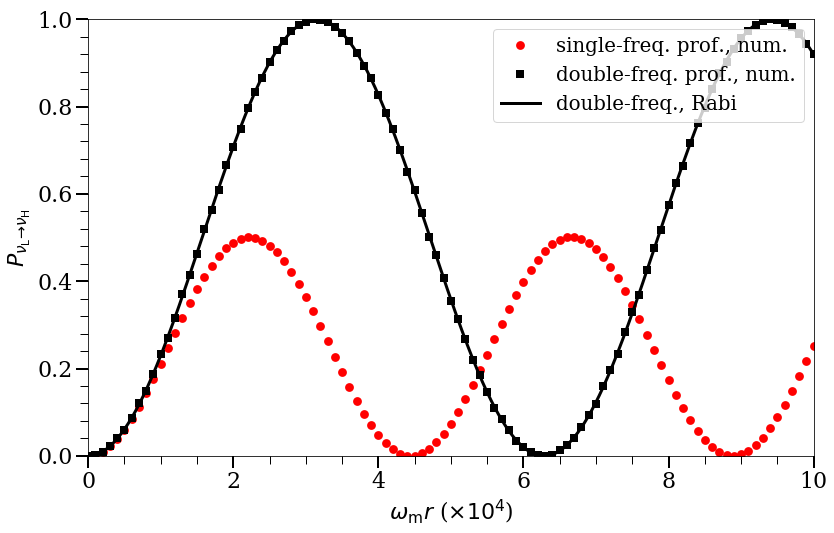

In [69]:
interference, interferenceax = plt.subplots()

dashes1 = [5,2,10,5] # 5 points on, 2 off, 3 on, 1 off

x_lim_max = 1e5
inter_x = np.linspace(0, x_lim_max, x_lim_max )
inter_ak1= [1e-4, 1, 1e-2, 0.1]
inter_ak2= [1e-4, 1, 1e-2, 10]
inter_ak3= [1e-4, 1, 5*1e-2, 0.1]
inter_ak4= [1e-4, 1, 5*1e-2, 10]

inter_seg = 100

interferenceplt = plt.plot(\
                           papersol1[0][0::inter_seg],papersol1[1][0::inter_seg],'ro',\
                           papersol2[0][0::inter_seg],papersol2[1][0::inter_seg],'ks', \
#                            papertheory1[0][0::inter_seg*5], papertheory1[1][0::inter_seg*5],'ro',\
                           markersize=ftsz*0.4, linewidth=2, fillstyle='full',  markeredgewidth=0.0)
plt.plot(papertheory2[0][0::], papertheory2[1][0::],'k-', linewidth=3)

plt.xlabel('$\omega_{\mathrm{m}}r$ ($\\times 10^4$)', fontsize=ftsz)
plt.ylabel(r'$P_{\nu_\mathrm{L}\to\nu_\mathrm{H}}$', fontsize=ftsz)
plt.ylim([0,1.0])
plt.xlim([0,x_lim_max])


interferenceax.tick_params('both', length=12, width=2, which='major', labelsize=ftsz, top='off', right='off')
interferenceax.tick_params('both', length=8, width=1, which='minor', labelsize=ftsz, top='off', right='off')

interferencemajorLocator = MultipleLocator(20000)
interferencemajorFormatter = FormatStrFormatter('%.2e')
interferenceminorLocator = MultipleLocator(5000)

interferencemajorLocatory = MultipleLocator(0.2)
interferencemajorFormattery = FormatStrFormatter('%0.1f')
interferenceminorLocatory = MultipleLocator(0.04)


interferenceax.xaxis.set_major_locator(interferencemajorLocator)
interferenceax.xaxis.set_major_formatter(interferencemajorFormatter)

interferenceax.yaxis.set_major_locator(interferencemajorLocatory)
interferenceax.yaxis.set_major_formatter(interferencemajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
interferencexlabels = ['', '0','2','4','6', '8','10']
interferenceax.set_xticklabels(interferencexlabels)

# for the minor ticks, use no labels; default NullFormatter
interferenceax.xaxis.set_minor_locator(interferenceminorLocator)
interferenceax.yaxis.set_minor_locator(interferenceminorLocatory)


# interferenceax.axhline(papersolgridlines[0], linestyle=':', color='b')
# interferenceax.axhline(papersolgridlines[1], linestyle='--', color='r')
# interferenceax.axhline(papersolgridlines[2], linestyle='-', color='k')
# interferenceax.axhline(papersolgridlines[3], linestyle='-.', color='k')
plt.legend(['single-freq. prof., num.', 'double-freq. prof., num.', 'double-freq., Rabi'],fontsize=ftsz*0.9,frameon=True,loc=1)
# plt.show()

plt.savefig('interference-enhance-slide-with-legend.pdf',bbox_inches='tight')